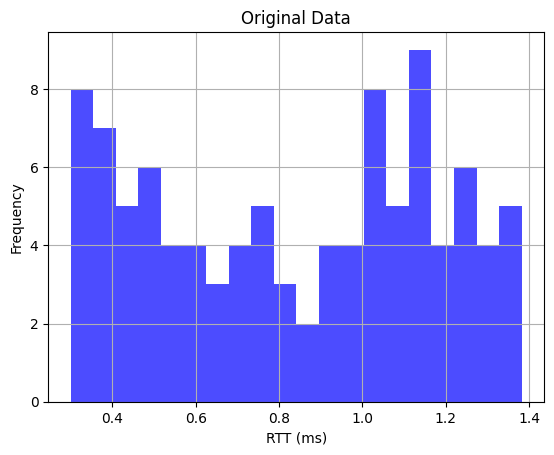

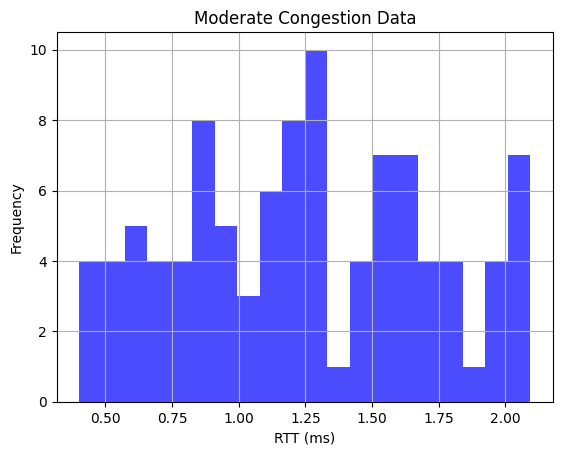

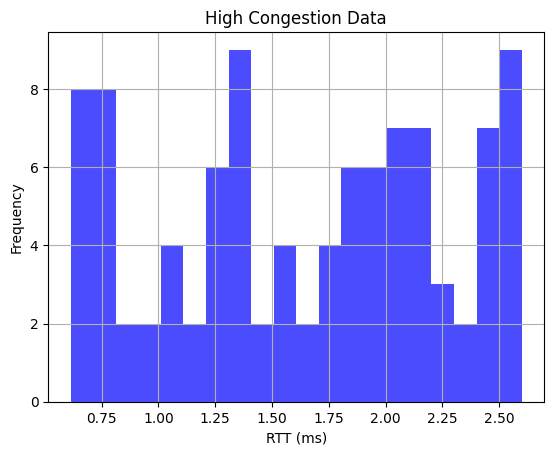

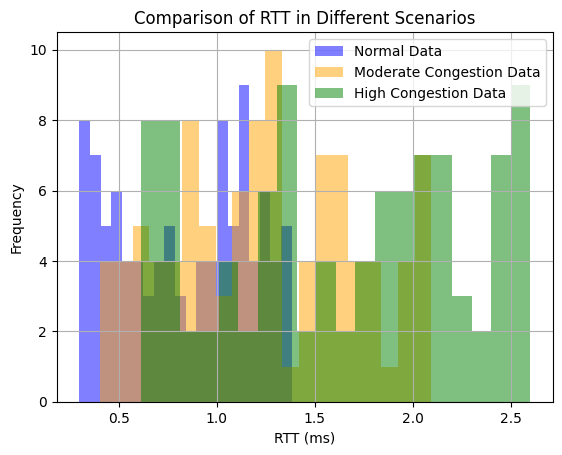

In [47]:
import csv
import statistics
import matplotlib.pyplot as plt

def read_data(filename):
    rtt_values = []
    with open(filename, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            rtt = float(row['RTT (ms)'])  # Extract RTT value from 'RTT (ms)' column
            rtt_values.append(rtt)
    return rtt_values

def calculate_statistics(rtt_values):
    avg_rtt = round(statistics.mean(rtt_values), 3)
    max_rtt = round(max(rtt_values), 3)
    min_rtt = round(min(rtt_values), 3)
    std_dev = round(statistics.stdev(rtt_values), 3)
    return avg_rtt, max_rtt, min_rtt, std_dev

def plot_histogram(data, title):
    plt.hist(data, bins=20, alpha=0.7, color='blue')
    plt.title(title)
    plt.xlabel('RTT (ms)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

def main():
    # Read original data
    original_data_file = 'normal_data_64.csv'
    original_rtt_values = read_data(original_data_file)
    
    # Read moderate congestion data
    moderate_congestion_file = 'moderate_congestion_data_64.csv'
    moderate_rtt_values = read_data(moderate_congestion_file)
    
    # Read high congestion data
    high_congestion_file = 'high_congestion_data_64.csv'
    high_rtt_values = read_data(high_congestion_file)
    
    # Calculate statistics for original data
    orig_avg_rtt, orig_max_rtt, orig_min_rtt, orig_std_dev = calculate_statistics(original_rtt_values)
    
    # Calculate statistics for moderate congestion data
    mod_avg_rtt, mod_max_rtt, mod_min_rtt, mod_std_dev = calculate_statistics(moderate_rtt_values)
    
    # Calculate statistics for high congestion data
    high_avg_rtt, high_max_rtt, high_min_rtt, high_std_dev = calculate_statistics(high_rtt_values)
    
    # Plot histograms for each scenario
    plot_histogram(original_rtt_values, "Original Data")
    plot_histogram(moderate_rtt_values, "Moderate Congestion Data")
    plot_histogram(high_rtt_values, "High Congestion Data")
    
    # Plot comparison graph
    plt.hist(original_rtt_values, bins=20, alpha=0.5, color='blue', label='Normal Data')
    plt.hist(moderate_rtt_values, bins=20, alpha=0.5, color='orange', label='Moderate Congestion Data')
    plt.hist(high_rtt_values, bins=20, alpha=0.5, color='green', label='High Congestion Data')
    plt.title('Comparison of RTT in Different Scenarios')
    plt.xlabel('RTT (ms)')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()


In [48]:
import pandas as pd
import itertools

# Load CSV files into DataFrames
normal_df = pd.read_csv("normal_data_1500.csv")
moderate_congestion_df = pd.read_csv("moderate_congestion_data_1500.csv")
high_congestion_df = pd.read_csv("high_congestion_data_1500.csv")

# Full factorial analysis
factors = ['TTL', 'Packet Size', 'Interval']

# Define TTL values for each scenario
ttl_values = {
    'Normal': 64,
    'Moderate Congestion': 32,
    'High Congestion': 16
}

# Generate combinations based on specific scenario configurations
for scenario, df in [('Normal', normal_df), ('Moderate Congestion', moderate_congestion_df), ('High Congestion', high_congestion_df)]:
    ttl_values = df['TTL'].unique()
    packet_size_values = df['Packet Size'].unique()
    interval_values = df['Interval'].dropna().unique()
    
    for ttl, packet_size, interval in itertools.product(ttl_values, packet_size_values, interval_values):
        subset_df = df[(df['TTL'] == ttl) & (df['Packet Size'] == packet_size) & (df['Interval'] == interval)]
        if not subset_df.empty:
            min_rtt = subset_df['RTT (ms)'].min()
            max_rtt = subset_df['RTT (ms)'].max()
            avg_rtt = subset_df['RTT (ms)'].mean()
            std_dev_rtt = subset_df['RTT (ms)'].std()
            print(f"Scenario: {scenario}")
            print(f"TTL: {ttl}, Packet Size: {packet_size}, Interval: {interval}")
            print(f"Min RTT: {min_rtt:.3f} ms")
            print(f"Max RTT: {max_rtt:.3f} ms")
            print(f"Avg RTT: {avg_rtt:.3f} ms")
            print(f"Std Dev RTT: {std_dev_rtt:.3f} ms\n")
        else:
            print(f"No data for TTL: {ttl}, Packet Size: {packet_size}, Interval: {interval} in {scenario} scenario")


Scenario: Normal
TTL: 64, Packet Size: 1500, Interval: 0.2
Min RTT: 0.300 ms
Max RTT: 1.382 ms
Avg RTT: 0.837 ms
Std Dev RTT: 0.338 ms

Scenario: Moderate Congestion
TTL: 32, Packet Size: 1500, Interval: 0.5
Min RTT: 0.403 ms
Max RTT: 2.094 ms
Avg RTT: 1.246 ms
Std Dev RTT: 0.467 ms

Scenario: High Congestion
TTL: 16, Packet Size: 1500, Interval: 1
Min RTT: 0.614 ms
Max RTT: 2.599 ms
Avg RTT: 1.641 ms
Std Dev RTT: 0.618 ms



In [22]:
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 14.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 7.1 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 12.1 MB/s eta 0:00:00


In [50]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Load CSV files into DataFrames
normal_df = pd.read_csv("normal_data_1500.csv")
moderate_congestion_df = pd.read_csv("moderate_congestion_data_1500.csv")
high_congestion_df = pd.read_csv("high_congestion_data_1500.csv")

# Combine DataFrames
combined_df = pd.concat([normal_df, moderate_congestion_df, high_congestion_df], ignore_index=True)

# Perform ANOVA for each factor and their interactions
formula = "Q('RTT (ms)') ~ C(TTL) + C(Interval) + C(TTL):C(Interval)"
lm = ols(formula, combined_df).fit()
anova_results = anova_lm(lm)
print(anova_results)


                       df     sum_sq    mean_sq          F        PR(>F)
C(TTL)                2.0  32.342599  16.171299  67.879879  5.268326e-25
C(Interval)           2.0   0.070441   0.035220   0.147840  8.626330e-01
C(TTL):C(Interval)    4.0   0.432783   0.108196   0.454157  7.693379e-01
Residual            297.0  70.755517   0.238234        NaN           NaN


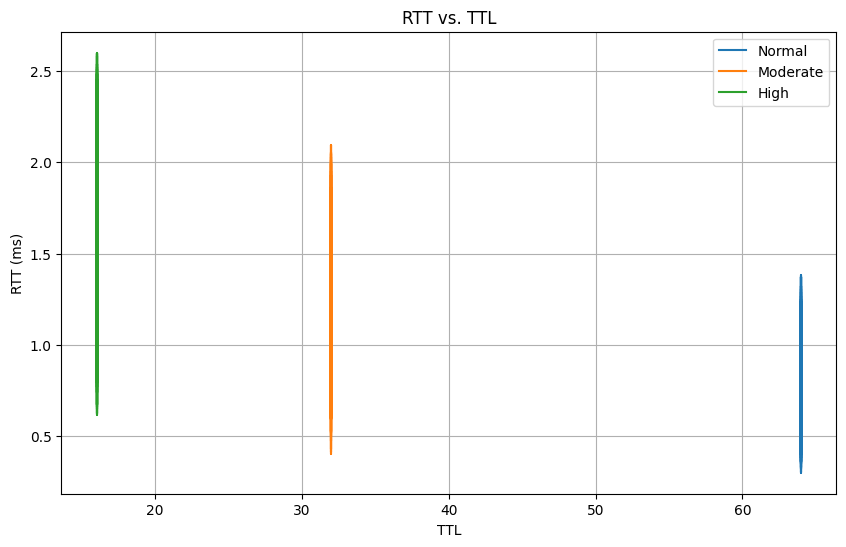

In [62]:
import csv
import matplotlib.pyplot as plt

def read_data(filename):
    rtt_values = []
    factor_values = []
    with open(filename, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            rtt = float(row['RTT (ms)'])  # Extract RTT value from 'RTT (ms)' column
            rtt_values.append(rtt)
            factor_value = float(row['TTL'])  # Extract factor value (change 'TTL' to desired factor)
            factor_values.append(factor_value)
    return rtt_values, factor_values

def main():
    # Read data and factor values
    data_files = ['normal_data.csv', 'moderate_congestion_data.csv', 'high_congestion_data.csv']  # Change to your CSV file names
    
    plt.figure(figsize=(10, 6))  # Adjust figure size
    
    for data_file in data_files:
        rtt_values, factor_values = read_data(data_file)
        
        # Extract congestion level from file name
        congestion_level = data_file.split('_')[2].split('.')[0].capitalize()
        
        # Plot RTT vs. Factor as line graph
        plt.plot(factor_values, rtt_values, label=congestion_level)  # Use congestion level as label
    
    # Add labels and title
    plt.title('RTT vs. TTL')
    plt.xlabel('TTL')
    plt.ylabel('RTT (ms)')
    plt.legend()  # Add legend to distinguish between different congestion levels
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()


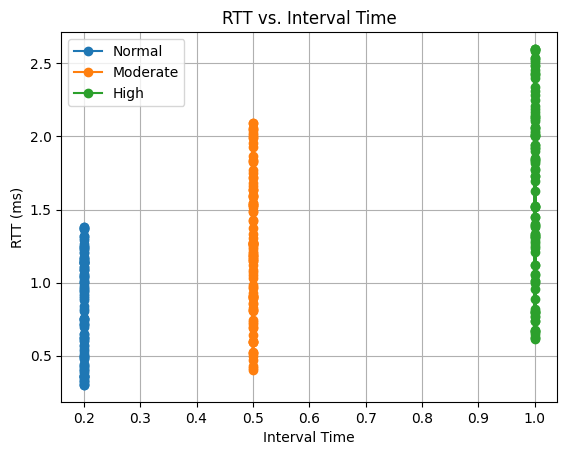

In [67]:
import csv
import matplotlib.pyplot as plt

def read_data(filename):
    rtt_values = []
    factor_values = []
    with open(filename, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            rtt = float(row['RTT (ms)'])  # Extract RTT value from 'RTT (ms)' column
            rtt_values.append(rtt)
            factor_value = float(row['Interval'])  # Extract factor value (Interval in this case)
            factor_values.append(factor_value)
    return rtt_values, factor_values

def main():
    # Read data and factor values
    data_files = ['normal_data.csv', 'moderate_congestion_data.csv', 'high_congestion_data.csv']
    congestion_levels = ['Normal', 'Moderate', 'High']
    
    # Plot RTT vs. Interval for each dataset
    for data_file, congestion_level in zip(data_files, congestion_levels):
        rtt_values, factor_values = read_data(data_file)
        plt.plot(factor_values, rtt_values, label=congestion_level, marker='o')
    
    # Add labels and legend
    plt.title('RTT vs. Interval Time')
    plt.xlabel('Interval Time')
    plt.ylabel('RTT (ms)')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()


In [42]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.5 MB/s eta 0:00:00a 0:00:01


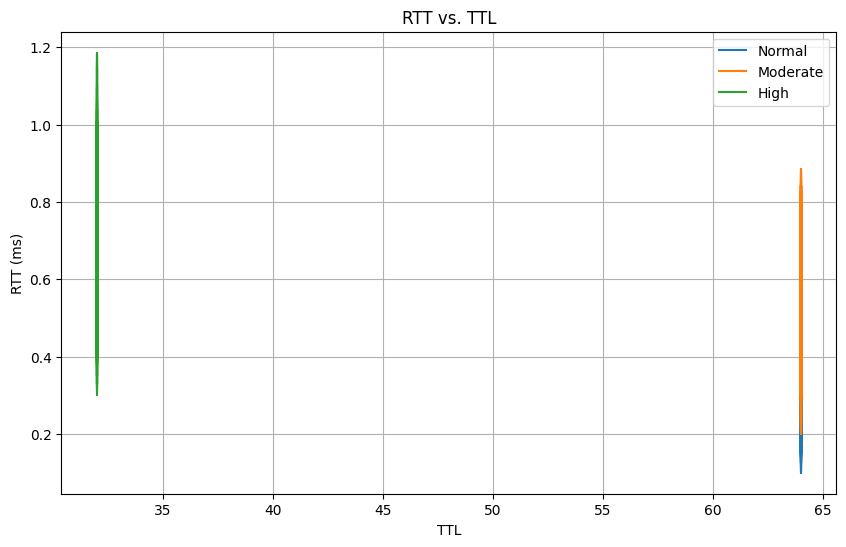

In [61]:
import csv
import matplotlib.pyplot as plt

def read_data(filename):
    rtt_values = []
    factor_values = []
    with open(filename, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            rtt = float(row['RTT (ms)'])  # Extract RTT value from 'RTT (ms)' column
            rtt_values.append(rtt)
            factor_value = float(row['TTL'])  # Extract factor value (change 'TTL' to desired factor)
            factor_values.append(factor_value)
    return rtt_values, factor_values

def main():
    # Read data and factor values
    data_files = ['128_normal_data.csv', '128_moderate_congestion_data.csv', '128_high_congestion_data.csv']  # Change to your CSV file names
    plt.figure(figsize=(10, 6))  # Adjust figure size
    
    for data_file in data_files:
        rtt_values, factor_values = read_data(data_file)
        congestion_level = data_file.split('_')[1]  # Extract congestion level from file name
        
        # Map file names to congestion levels
        if congestion_level == 'normal':
            congestion_level = 'Normal'
        elif congestion_level == 'moderate':
            congestion_level = 'Moderate'
        elif congestion_level == 'high':
            congestion_level = 'High'
        
        # Plot RTT vs. Factor as line graph
        plt.plot(factor_values, rtt_values, label=congestion_level)  # Use congestion level as label
    
    # Add labels and title
    plt.title('RTT vs. TTL')
    plt.xlabel('TTL')
    plt.ylabel('RTT (ms)')
    plt.legend()  # Add legend to distinguish between different congestion levels
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()


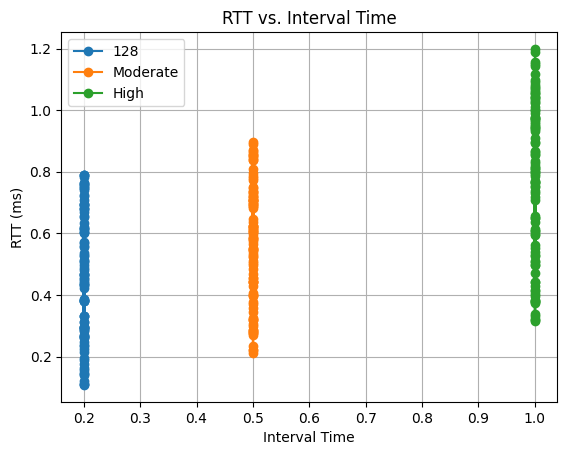

In [56]:
import csv
import matplotlib.pyplot as plt

def read_data(filename):
    rtt_values = []
    factor_values = []
    with open(filename, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            rtt = float(row['RTT (ms)'])  # Extract RTT value from 'RTT (ms)' column
            rtt_values.append(rtt)
            factor_value = float(row['Interval'])  # Extract factor value (Interval in this case)
            factor_values.append(factor_value)
    return rtt_values, factor_values

def main():
    # Read data and factor values
    data_files = ['128_normal_data.csv', '128_moderate_congestion_data.csv', '1128_high_congestion_data.csv']
    
    # Plot RTT vs. Interval for each dataset
    for data_file in data_files:
        rtt_values, factor_values = read_data(data_file)
        plt.plot(factor_values, rtt_values, label=data_file.split('_')[-3].capitalize(), marker='o')
    
    # Add labels and legend
    plt.title('RTT vs. Interval Time')
    plt.xlabel('Interval Time')
    plt.ylabel('RTT (ms)')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()
